In [7]:
#read
#convert ohlc

In [1]:
import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv("dataBITCoin/krakenEUR.csv.gz",header=None, names=["ts","price","volume"],index_col="ts")

/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data.head()

,price,volume
ts,,
1389173189,624.01000,0.20000
1389173198,624.01000,0.09767
1389173198,623.53836,0.01358
1389173265,623.53836,0.14896
1389173339,623.54066,0.20000


In [4]:
#data=data

In [5]:
data.describe()

,price,volume
count,2.522749e+07,2.522749e+07
mean,4.603733e+03,4.201418e-01
std,3.477302e+03,1.541445e+00
min,1.481712e+02,0.000000e+00
25%,1.404612e+03,1.288000e-02
50%,3.906900e+03,5.949156e-02
75%,6.889300e+03,2.585900e-01
max,2.000000e+04,4.400000e+02


In [6]:
data.shape

(25227493, 2)

In [7]:
#que periodo

In [8]:
#primer periodo
data.index[0]

1389173189

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([  27752.,   34387.,   62918.,   47785.,   61890.,   60653.,
          31978.,   64491.,   61504.,   43065.,   25909.,   35501.,
          46574.,   32894.,   66441.,   29920.,   45794.,   40328.,
          37808.,   35491.,  100677.,   60571.,   60882.,   53097.,
          39460.,   44384.,   34881.,   47659.,   40008.,   51345.,
          44255.,   53826.,   87470.,   48406.,   42752.,   67906.,
         180596.,   91414.,  128411.,   74750.,   58447.,       0.,
              0.,  128477.,   77651.,   96060.,   81742.,  143414.,
         258119.,  175932.,   93490.,  145518.,   73669.,   77507.,
          67304.,   88298.,  129423.,  118806.,  115736.,  256553.,
         171552.,  206438.,  228763.,  466097.,  331810.,  278247.,
         588788.,  801235.,  638777.,  510525.,  576764.,  621319.,
         570370.,  587621.,  336202.,  436948.,  583949.,  513537.,
         748189.,  616753., 1251739., 1433628.,  811690.,  824681.,
         527199.,  574939.,  562189.,  483025., 

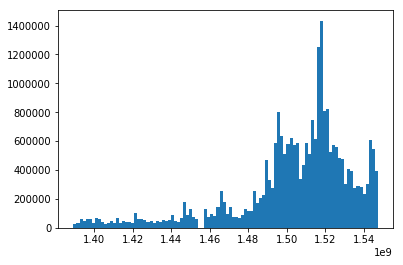

In [10]:
#histograma del indice
plt.hist(data.index,bins=100)

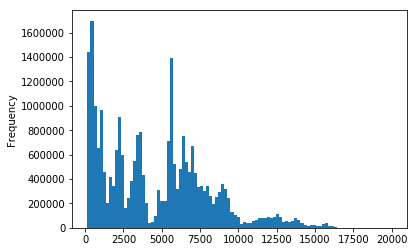

In [11]:
data["price"].plot(kind="hist",bins=100)

In [12]:
sa=data.sample(100000)

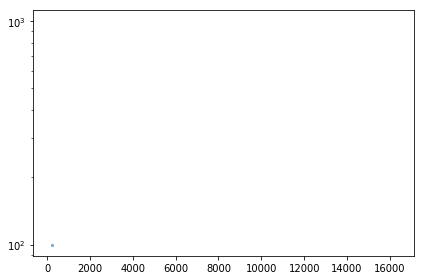

In [13]:
fig,ax=plt.subplots(1,1)
_ = ax.scatter(sa["price"],sa["volume"],alpha=0.5,s=5)
plt.yscale("log")
plt.tight_layout()

In [14]:
data.index[0]

1389173189

In [15]:
data.iloc[0]

price     624.01
volume      0.20
Name: 1389173189, dtype: float64

In [16]:
data.index.min(),data.index.max()

(1389173189, 1547206159)

In [17]:
pd.to_datetime(data.index[0],unit="s"),pd.to_datetime(data.index[-1],unit="s")

(Timestamp('2014-01-08 09:26:29'), Timestamp('2019-01-11 11:29:19'))

In [18]:
#cogemos los últimos 1 millon de transacciones
last_data = data.iloc[-100000:]

In [19]:
last_data.shape

(100000, 2)

In [20]:
#convertimos los indices timestamp a datetime
last_data.index = pd.to_datetime(last_data.index,unit="s")

In [21]:
last_data.head()

,price,volume
ts,,
2019-01-06 19:42:20,3559.5,0.357643
2019-01-06 19:42:20,3559.8,0.642438
2019-01-06 19:42:27,3559.5,0.090000
2019-01-06 19:42:34,3559.8,0.010000
2019-01-06 19:42:36,3559.8,0.010000


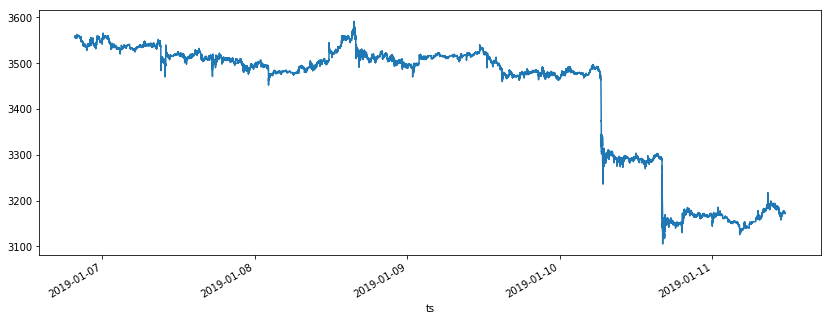

In [22]:
last_data['price'].plot(figsize=(14,5))

In [23]:
last_data["hour"]=last_data.index.hour

/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
last_data.head()

,price,volume,hour
ts,,,
2019-01-06 19:42:20,3559.5,0.357643,19
2019-01-06 19:42:20,3559.8,0.642438,19
2019-01-06 19:42:27,3559.5,0.090000,19
2019-01-06 19:42:34,3559.8,0.010000,19
2019-01-06 19:42:36,3559.8,0.010000,19


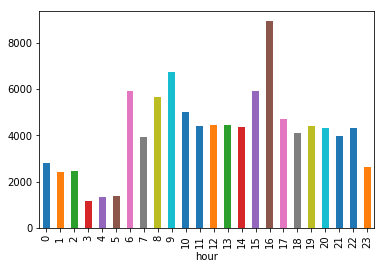

In [25]:
last_data.groupby("hour").count()["price"].plot(kind="bar")

In [26]:
last_data

,price,volume,hour
ts,,,
2019-01-06 19:42:20,3559.5,0.357643,19
2019-01-06 19:42:20,3559.8,0.642438,19
2019-01-06 19:42:27,3559.5,0.090000,19
2019-01-06 19:42:34,3559.8,0.010000,19
2019-01-06 19:42:36,3559.8,0.010000,19
2019-01-06 19:42:48,3559.7,0.100000,19
2019-01-06 19:42:53,3559.8,0.010000,19
2019-01-06 19:43:01,3559.8,0.010000,19
2019-01-06 19:43:03,3559.8,0.070000,19


In [27]:

#resample is like groupby and agg done aggregation operations needed, 'first' and 'last' is especial operation 
#also que can do max min and custom operations
mdata= last_data.resample("1h").agg(
    {'price' : ['first',max,min,'last'],
      'volume': sum
    }    
)

In [28]:
mdata

price                               volume
                      first     max     min    last          sum
ts                                                              
2019-01-06 19:00:00  3559.5  3559.8  3555.0  3555.9    37.818370
2019-01-06 20:00:00  3555.9  3562.8  3538.1  3540.1   241.595316
2019-01-06 21:00:00  3540.2  3545.9  3528.1  3537.9   339.739870
2019-01-06 22:00:00  3538.0  3556.0  3531.6  3532.3   451.938850
2019-01-06 23:00:00  3532.3  3560.2  3532.3  3543.7   107.629864
2019-01-07 00:00:00  3541.5  3565.5  3541.5  3557.2   159.298638
2019-01-07 01:00:00  3557.1  3557.2  3530.1  3539.9    99.199614
2019-01-07 02:00:00  3534.3  3538.0  3520.1  3530.3    34.796054
2019-01-07 03:00:00  3530.2  3539.9  3530.1  3539.7    36.980483
2019-01-07 04:00:00  3539.5  3541.5  3528.6  3531.3    29.195281
2019-01-07 05:00:00  3531.3  3539.6  3525.0  3539.6    34.305957
2019-01-07 06:00:00  3539.6  3548.5  3534.5  3540.3   123.608933
2019-01-07 07:00:00  3540.3  3544.3  3534.2  3540.7   114.995425
2019-01-07 08:00:00  3540.7  3552.0  3531.1  3545.8   262.679391
2019-01-07 09:00:00  3545.5  3549.2  3470.0  3496.5   801.125896
2019-01-07 10:00:00  3498.6  3539.8  3496.8  3515.2   266.722075
2019-01-07 11:00:00  3515.3  3525.1  3515.1  3524.8   204.730139
2019-01-07 12:00:00  3522.9  3523.0  3501.0  3504.1   291.985243
2019-01-07 13:00:00  3504.6  3519.9  3497.9  3516.5   329.644364
2019-01-07 14:00:00  3516.5  3529.5  3511.2  3520.4   313.045303
2019-01-07 15:00:00  3520.3  3532.3  3503.3  3506.1   263.587598
2019-01-07 16:00:00  3506.1  3516.5  3505.5  3513.5   225.216481
2019-01-07 17:00:00  3513.5  3520.0  3471.0  3509.2   413.505409
2019-01-07 18:00:00  3509.2  3522.2  3498.1  3508.1   251.177493
2019-01-07 19:00:00  3508.8  3513.7  3502.0  3512.0   214.175240
2019-01-07 20:00:00  3512.0  3512.0  3495.2  3500.7   184.065769
2019-01-07 21:00:00  3500.3  3510.0  3496.0  3498.9   164.546505
2019-01-07 22:00:00  3498.9  3502.2  3480.5  3489.7   434.627478
2019-01-07 23:00:00  3485.0  3498.7  3476.0  3498.0   169.080047
2019-01-08 00:00:00  3498.0  3507.2  3490.5  3507.1   142.310672
...                     ...     ...     ...     ...          ...
2019-01-10 06:00:00  3490.3  3492.3  3236.0  3312.5  1763.783505
2019-01-10 07:00:00  3307.7  3311.3  3281.2  3305.7   628.462078
2019-01-10 08:00:00  3305.7  3308.0  3282.7  3289.9   812.579935
2019-01-10 09:00:00  3289.8  3296.5  3272.5  3284.4   833.166413
2019-01-10 10:00:00  3286.3  3297.9  3284.4  3286.5   455.819841
2019-01-10 11:00:00  3287.6  3297.2  3281.9  3296.6   294.895931
2019-01-10 12:00:00  3296.6  3303.7  3282.7  3291.6   396.653934
2019-01-10 13:00:00  3288.3  3298.0  3269.7  3289.1   531.839501
2019-01-10 14:00:00  3286.9  3298.0  3279.5  3295.6   419.800737
2019-01-10 15:00:00  3295.6  3302.8  3291.0  3294.2   290.104254
2019-01-10 16:00:00  3294.2  3295.4  3105.2  3159.2  1838.204243
2019-01-10 17:00:00  3159.2  3162.7  3142.0  3152.5   531.434191
2019-01-10 18:00:00  3152.5  3152.9  3139.8  3149.2   363.584935
2019-01-10 19:00:00  3149.2  3181.7  3130.0  3176.0   545.468346
2019-01-10 20:00:00  3176.0  3185.0  3166.7  3168.9   278.543983
2019-01-10 21:00:00  3168.9  3173.0  3163.8  3171.9    82.638754
2019-01-10 22:00:00  3171.9  3172.3  3160.6  3169.1   118.813728
2019-01-10 23:00:00  3166.8  3172.2  3162.7  3162.7    48.318162
2019-01-11 00:00:00  3162.7  3185.5  3144.1  3173.5   242.704102
2019-01-11 01:00:00  3176.0  3177.5  3160.4  3162.4    67.613129
2019-01-11 02:00:00  3162.4  3166.5  3150.3  3151.7    97.267302
2019-01-11 03:00:00  3151.1  3155.7  3149.7  3154.0   106.366101
2019-01-11 04:00:00  3153.8  3153.8  3125.6  3138.7    95.813542
2019-01-11 05:00:00  3138.7  3154.0  3138.6  3152.6    90.830170
2019-01-11 06:00:00  3149.5  3163.2  3148.2  3161.1   149.917815
2019-01-11 07:00:00  3161.1  3178.2  3157.6  3174.3   326.359000
2019-01-11 08:00:00  3174.3  3217.6  3174.3  3183.0   498.701336
2019-01-11 09:00:00  3183.1  3199.3  3180.0  3183.4   455

In [29]:
mdata.columns

MultiIndex(levels=[['price', 'volume'], ['first', 'last', 'max', 'min', 'sum']],
           labels=[[0, 0, 0, 0, 1], [0, 2, 3, 1, 4]])

In [30]:
#eliminamos el primer nivel price volume no sirve
mdata.columns=mdata.columns.droplevel(0)

In [31]:
mdata.head()

,first,max,min,last,sum
ts,,,,,
2019-01-06 19:00:00,3559.5,3559.8,3555.0,3555.9,37.818370
2019-01-06 20:00:00,3555.9,3562.8,3538.1,3540.1,241.595316
2019-01-06 21:00:00,3540.2,3545.9,3528.1,3537.9,339.739870
2019-01-06 22:00:00,3538.0,3556.0,3531.6,3532.3,451.938850
2019-01-06 23:00:00,3532.3,3560.2,3532.3,3543.7,107.629864


In [32]:
#renombramos columnas
mdata.rename(columns={'first':'open','max':'high','min':'low','last':'close','sum':'volume'},inplace=True)

In [33]:
mdata.head()

,open,high,low,close,volume
ts,,,,,
2019-01-06 19:00:00,3559.5,3559.8,3555.0,3555.9,37.818370
2019-01-06 20:00:00,3555.9,3562.8,3538.1,3540.1,241.595316
2019-01-06 21:00:00,3540.2,3545.9,3528.1,3537.9,339.739870
2019-01-06 22:00:00,3538.0,3556.0,3531.6,3532.3,451.938850
2019-01-06 23:00:00,3532.3,3560.2,3532.3,3543.7,107.629864


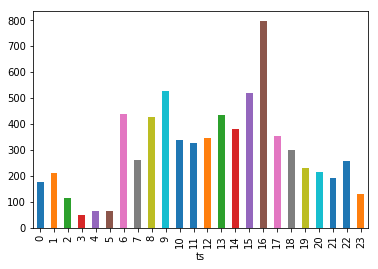

In [34]:
#el volumen medio por hora
mdata.groupby(mdata.index.hour).mean()['volume'].plot(kind="bar")

In [35]:
mdata.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25227493 entries, 1389173189 to 1547206159
Data columns (total 2 columns):
price     float64
volume    float64
dtypes: float64(2)
memory usage: 577.4 MB


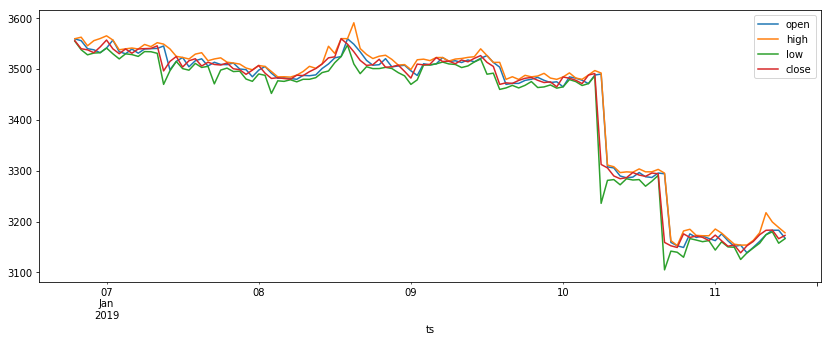

In [37]:
mdata.drop('volume',axis=1).plot(figsize=(14,5))

In [41]:
!pip install mpl_finance
from mpl_finance import  candlestick2_ohlc


  Using cached https://files.pythonhosted.org/packages/d3/83/92f0593ea39122075d115d2578034283bcc790f679cdbe61d0d3902c59f1/mpl_finance-0.10.0.tar.gz
  Running setup.py bdist_wheel for mpl-finance ... done
  Stored in directory: /home/dsc/.cache/pip/wheels/67/db/24/04ddd06ec9a5e4500b44c13d8e95898f5b90b512303e385de8
Successfully built mpl-finance


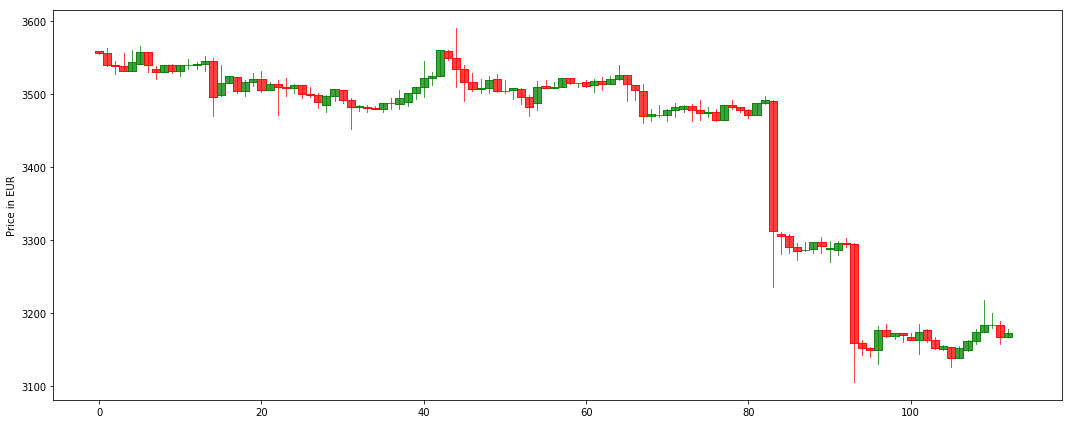

In [43]:
aux=mdata
fig,ax=plt.subplots(1,1,figsize=(15,6))
candlestick2_ohlc(ax,aux["open"],aux["high"],aux["low"],aux["close"],colorup='g',width=1)
ax.set_ylabel("Price in EUR")
plt.tight_layout()